# Floyd Warshall  Algorithm


Initial Graph:


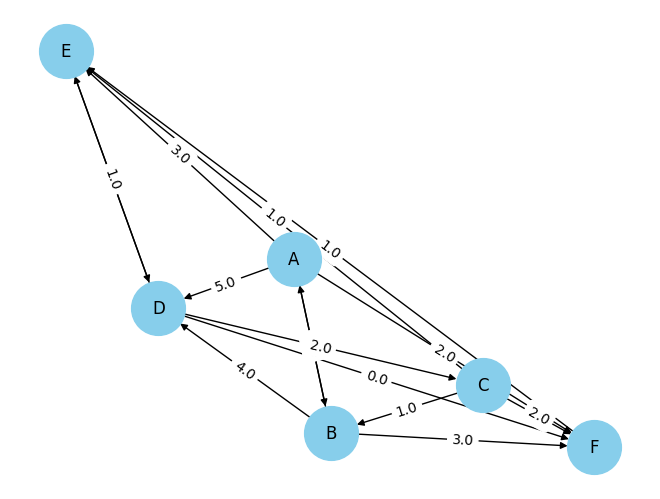


Initial Distance Matrix:
   A  B  C  D  E  F
A  0  3  ∞  5  3  2
B  2  0  ∞  4  ∞  3
C  ∞  1  0  ∞  1  2
D  ∞  ∞  2  0  1  0
E  ∞  ∞  ∞  1  0  ∞
F  ∞  ∞  ∞  ∞  1  0

Initial Path Reconstruction Matrix:
   A  B  C  D  E  F
A  -1  1  -1  3  4  5
B  0  -1  -1  3  -1  5
C  -1  1  -1  -1  4  5
D  -1  -1  2  -1  4  5
E  -1  -1  -1  3  -1  -1
F  -1  -1  -1  -1  4  -1

--- Iteration 1: Using A as an intermediate node ---
Relaxing edge B -> E via A: inf -> 5.0

Updated Distance Matrix:
   A  B  C  D  E  F
A  0  3  ∞  5  3  2
B  2  0  ∞  4  5  3
C  ∞  1  0  ∞  1  2
D  ∞  ∞  2  0  1  0
E  ∞  ∞  ∞  1  0  ∞
F  ∞  ∞  ∞  ∞  1  0

Updated Path Reconstruction Matrix:
   A  B  C  D  E  F
A  -1  1  -1  3  4  5
B  0  -1  -1  3  0  5
C  -1  1  -1  -1  4  5
D  -1  -1  2  -1  4  5
E  -1  -1  -1  3  -1  -1
F  -1  -1  -1  -1  4  -1

--- Iteration 2: Using B as an intermediate node ---
Relaxing edge C -> A via B: inf -> 3.0
Relaxing edge C -> D via B: inf -> 5.0

Updated Distance Matrix:
   A  B  C  D  E  F
A 

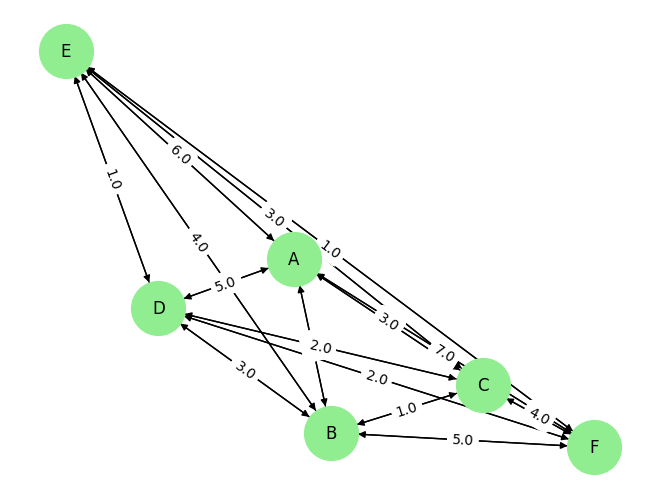


No negative weight cycles detected.


In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def print_matrix_with_labels(matrix, labels):
    """
    Utility function to print the matrix with node labels.
    """
    print("   " + "  ".join(labels))
    for i, row in enumerate(matrix):
        row_str = "  ".join(f"{val:.0f}" if val < float('inf') else "∞" for val in row)
        print(f"{labels[i]}  {row_str}")

def visualize_graph_and_shortest_paths(adjacency_matrix, labels):
    """
    Visualize the initial graph and compute shortest paths using Floyd-Warshall.
    """
    # Visualize Initial Graph
    print("\nInitial Graph:")
    G = nx.DiGraph()
    num_nodes = len(adjacency_matrix)

    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] != np.inf and i != j:
                G.add_edge(labels[i], labels[j], weight=adjacency_matrix[i][j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
    plt.show()

    # Compute Floyd-Warshall Shortest Paths
    num_nodes = len(adjacency_matrix)
    dist = adjacency_matrix.copy()
    next_node = np.full((num_nodes, num_nodes), -1)

    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] != np.inf and i != j:
                next_node[i][j] = j

    print("\nInitial Distance Matrix:")
    print_matrix_with_labels(dist, labels)

    print("\nInitial Path Reconstruction Matrix:")
    print_matrix_with_labels(next_node, labels)

    for k in range(num_nodes):
        print(f"\n--- Iteration {k+1}: Using {labels[k]} as an intermediate node ---")
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    print(f"Relaxing edge {labels[i]} -> {labels[j]} via {labels[k]}: {dist[i][j]} -> {dist[i][k] + dist[k][j]}")
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]

        print("\nUpdated Distance Matrix:")
        print_matrix_with_labels(dist, labels)

        print("\nUpdated Path Reconstruction Matrix:")
        print_matrix_with_labels(next_node, labels)

    # Visualize Shortest Paths
    print("\nGraph with Shortest Paths:")
    G.clear()
    for i in range(num_nodes):
        for j in range(num_nodes):
            if dist[i][j] != np.inf and i != j:
                G.add_edge(labels[i], labels[j], weight=dist[i][j])

    nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=1500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
    plt.show()

    # Check for negative cycles
    if detect_negative_cycles(dist):
        print("\nWarning: The graph contains a negative weight cycle!")
    else:
        print("\nNo negative weight cycles detected.")

def detect_negative_cycles(dist):
    """
    Check the diagonal of the distance matrix for negative cycles.
    """
    for i in range(len(dist)):
        if dist[i][i] < 0:
            return True
    return False

def main():
    """
    Main function to execute the Floyd-Warshall algorithm with a unified visualization.
    """
    # Define the adjacency matrix and labels directly
    labels = ['A', 'B', 'C', 'D', 'E', 'F']  # Node labels
    adjacency_matrix = np.array([
        [0, 3, np.inf, 5, 3, 2],
        [2, 0, np.inf, 4, np.inf, 3],
        [np.inf, 1, 0, np.inf, 1, 2],
        [np.inf, np.inf, 2, 0, 1, 0],
        [np.inf, np.inf, np.inf, 1, 0, np.inf],
        [np.inf, np.inf, np.inf, np.inf, 1, 0]
    ])

    visualize_graph_and_shortest_paths(adjacency_matrix, labels)

if __name__ == "__main__":
    main()


# Negative Cycle Detection with Output and Visualization


--- Running Floyd-Warshall with Negative Cycle Detection ---


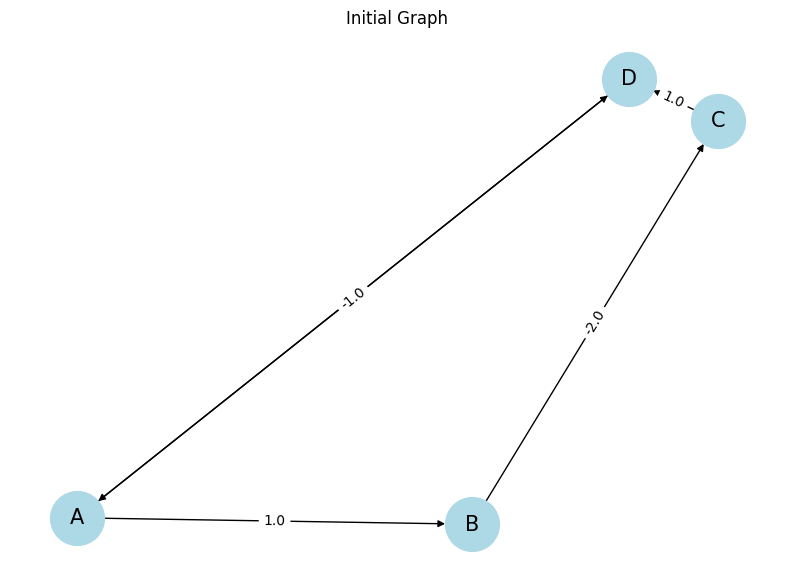


Initial Distance Matrix:
   A  B  C  D
A  0  1  ∞  -1
B  ∞  0  -2  ∞
C  ∞  ∞  0  1
D  -1  ∞  ∞  0

--- Iteration 1: Using A as an intermediate node ---
Relaxing edge D -> B via A: inf -> 0.0
Relaxing edge D -> D via A: 0.0 -> -2.0

Updated Distance Matrix:
   A  B  C  D
A  0  1  ∞  -1
B  ∞  0  -2  ∞
C  ∞  ∞  0  1
D  -1  0  ∞  -2

--- Iteration 2: Using B as an intermediate node ---
Relaxing edge A -> C via B: inf -> -1.0
Relaxing edge D -> C via B: inf -> -2.0

Updated Distance Matrix:
   A  B  C  D
A  0  1  -1  -1
B  ∞  0  -2  ∞
C  ∞  ∞  0  1
D  -1  0  -2  -2

--- Iteration 3: Using C as an intermediate node ---
Relaxing edge B -> D via C: inf -> -1.0

Updated Distance Matrix:
   A  B  C  D
A  0  1  -1  -1
B  ∞  0  -2  -1
C  ∞  ∞  0  1
D  -1  0  -2  -2

--- Iteration 4: Using D as an intermediate node ---
Relaxing edge A -> A via D: 0.0 -> -2.0
Relaxing edge A -> B via D: 1.0 -> -1.0
Relaxing edge A -> C via D: -1.0 -> -3.0
Relaxing edge A -> D via D: -1.0 -> -3.0
Relaxing edge B -> 

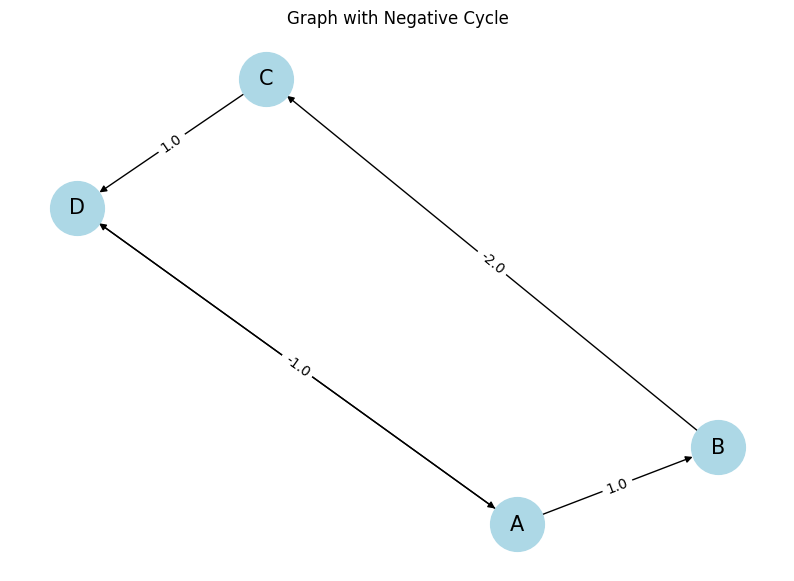

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def print_matrix_with_labels(matrix, labels):
    """
    Utility function to print the matrix with node labels.
    """
    print("   " + "  ".join(labels))
    for i, row in enumerate(matrix):
        row_str = "  ".join(f"{val:.0f}" if val < float('inf') else "∞" for val in row)
        print(f"{labels[i]}  {row_str}")

def visualize_graph(adjacency_matrix, labels, title):
    """
    Visualize the graph represented by the adjacency matrix.
    """
    G = nx.DiGraph()
    num_nodes = len(adjacency_matrix)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] != np.inf and i != j:
                G.add_edge(labels[i], labels[j], weight=adjacency_matrix[i][j])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    plt.title(title)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
    plt.show()

def floyd_warshall_with_negative_cycle_detection(adjacency_matrix, labels):
    """
    Floyd-Warshall algorithm with negative cycle detection and output.
    """
    num_nodes = len(adjacency_matrix)
    dist = adjacency_matrix.copy()

    print("\nInitial Distance Matrix:")
    print_matrix_with_labels(dist, labels)

    # Floyd-Warshall Iterations
    for k in range(num_nodes):
        print(f"\n--- Iteration {k+1}: Using {labels[k]} as an intermediate node ---")
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    print(f"Relaxing edge {labels[i]} -> {labels[j]} via {labels[k]}: {dist[i][j]} -> {dist[i][k] + dist[k][j]}")
                    dist[i][j] = dist[i][k] + dist[k][j]
        print("\nUpdated Distance Matrix:")
        print_matrix_with_labels(dist, labels)

    # Negative Cycle Detection
    for i in range(num_nodes):
        if dist[i][i] < 0:
            print("\nWarning: Negative weight cycle detected!")
            visualize_graph(adjacency_matrix, labels, title="Graph with Negative Cycle")
            return

    print("\nNo negative weight cycles detected.")
    visualize_graph(dist, labels, title="Graph with Shortest Paths")

def main():
    """
    Main function to execute the Floyd-Warshall algorithm with negative cycle detection.
    """
    labels = ['A', 'B', 'C', 'D']  # Node labels
    adjacency_matrix = np.array([
        [0, 1, np.inf, -1],
        [np.inf, 0, -2, np.inf],
        [np.inf, np.inf, 0, 1],
        [-1, np.inf, np.inf, 0]
    ])

    print("\n--- Running Floyd-Warshall with Negative Cycle Detection ---")
    visualize_graph(adjacency_matrix, labels, title="Initial Graph")
    floyd_warshall_with_negative_cycle_detection(adjacency_matrix, labels)

if __name__ == "__main__":
    main()


Initial Graph:


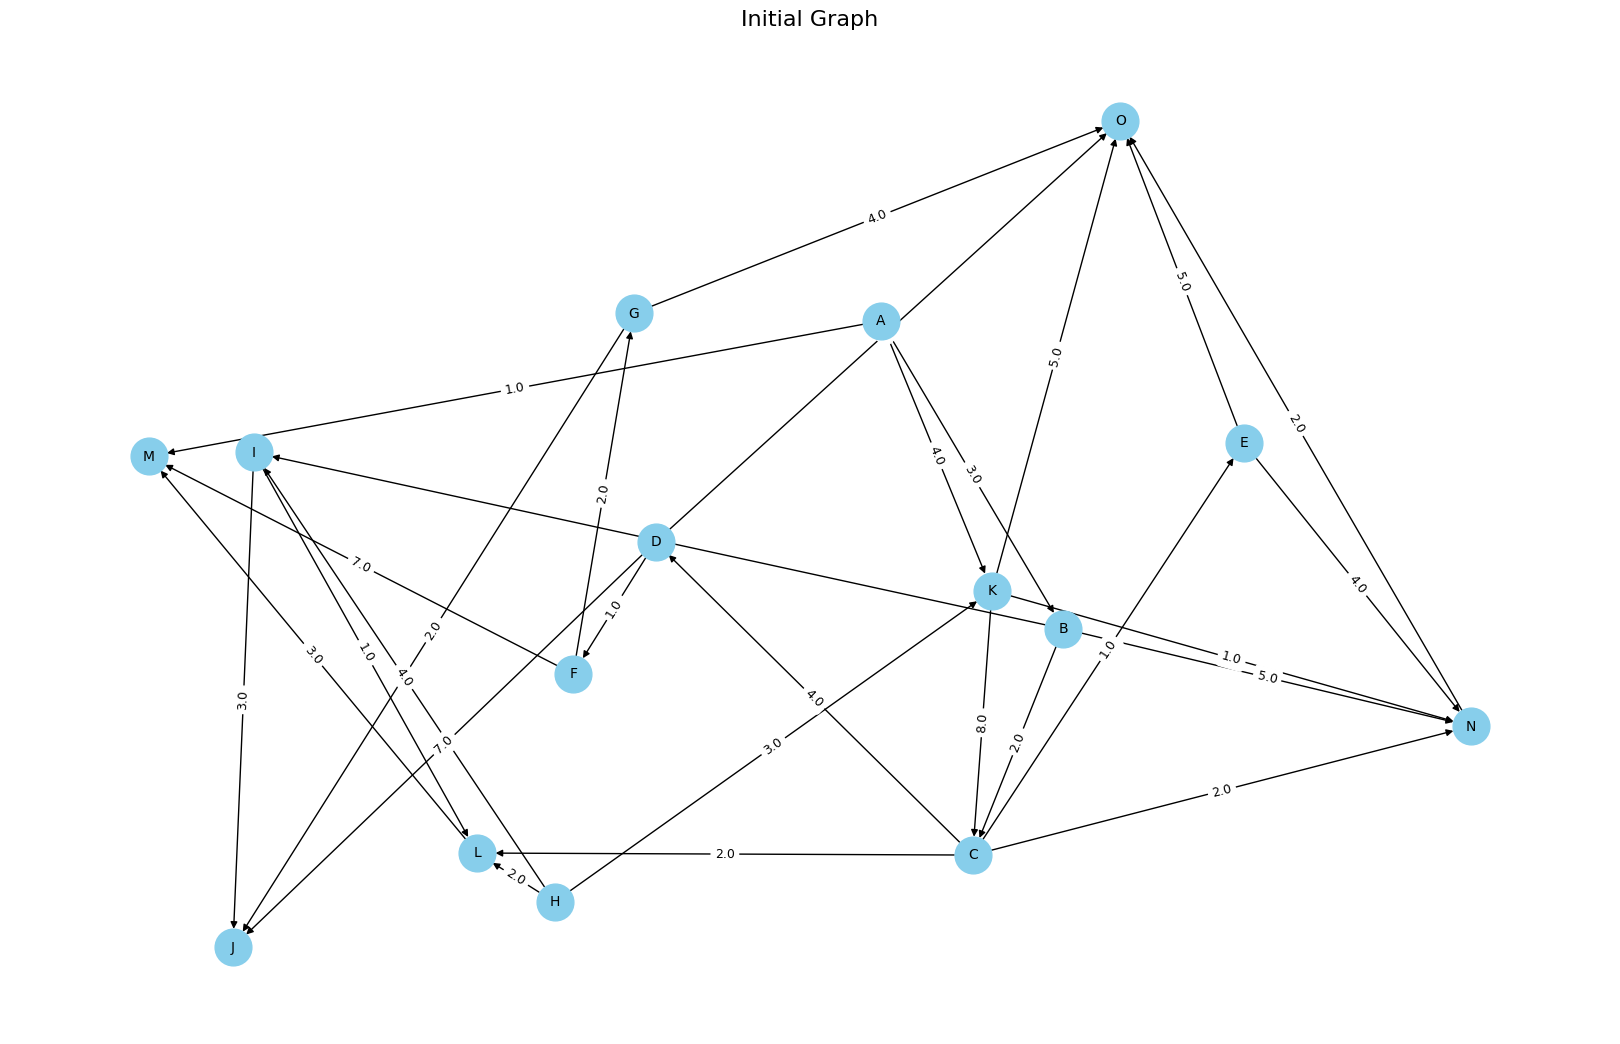


Initial Distance Matrix:
   A  B  C  D  E  F  G  H  I  J  K  L  M  N  O
A  0  3  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  4  ∞  1  ∞  ∞
B  ∞  0  2  ∞  ∞  ∞  ∞  ∞  3  ∞  ∞  ∞  ∞  5  ∞
C  ∞  ∞  0  4  1  ∞  ∞  ∞  ∞  ∞  ∞  2  ∞  2  ∞
D  ∞  ∞  ∞  0  ∞  1  ∞  ∞  ∞  7  ∞  ∞  ∞  ∞  6
E  ∞  ∞  ∞  ∞  0  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  4  5
F  ∞  ∞  ∞  ∞  ∞  0  2  ∞  ∞  ∞  ∞  ∞  7  ∞  ∞
G  ∞  ∞  ∞  ∞  ∞  ∞  0  ∞  ∞  2  ∞  ∞  ∞  ∞  4
H  ∞  ∞  ∞  ∞  ∞  ∞  ∞  0  4  ∞  3  2  ∞  ∞  ∞
I  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  0  3  ∞  1  ∞  ∞  ∞
J  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  0  ∞  ∞  ∞  ∞  ∞
K  ∞  ∞  8  ∞  ∞  ∞  ∞  ∞  ∞  ∞  0  ∞  ∞  1  5
L  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  0  3  ∞  ∞
M  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  0  ∞  ∞
N  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  0  2
O  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  ∞  0

Graph with Shortest Paths:


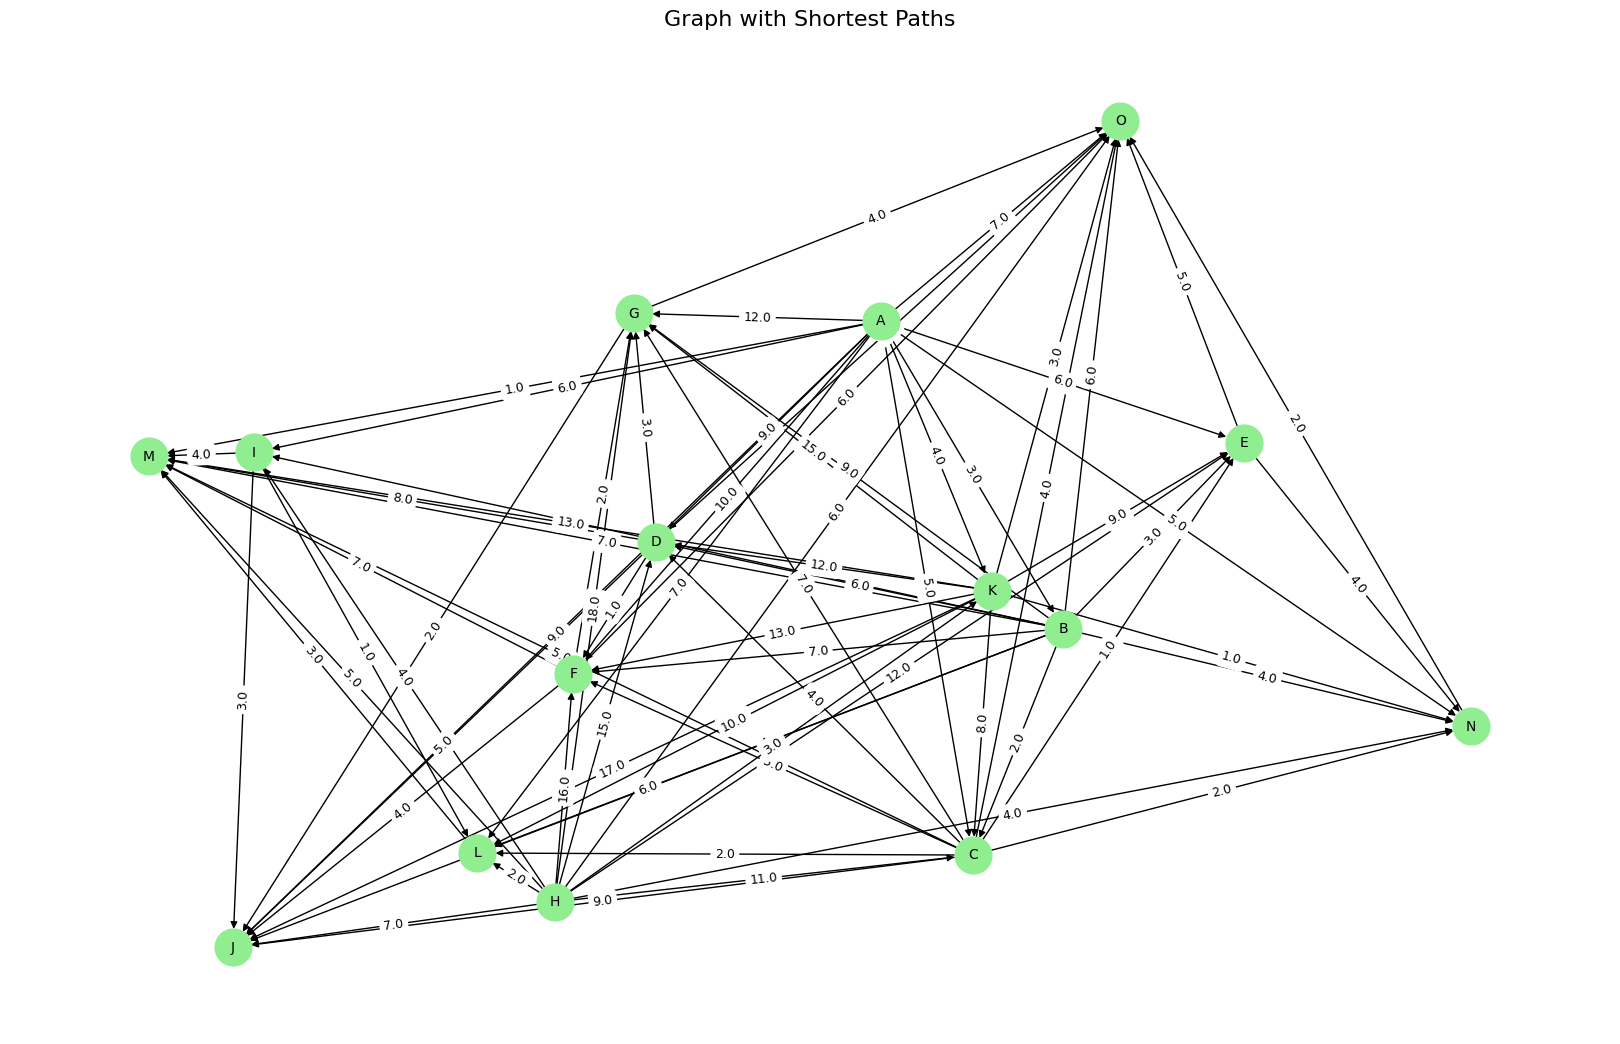

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def print_matrix_with_labels(matrix, labels):
    """
    Utility function to print the matrix with node labels.
    """
    print("   " + "  ".join(labels))
    for i, row in enumerate(matrix):
        row_str = "  ".join(f"{val:.0f}" if val < float('inf') else "∞" for val in row)
        print(f"{labels[i]}  {row_str}")

def visualize_graph_and_shortest_paths(adjacency_matrix, labels):
    """
    Visualize the initial graph and compute shortest paths using Floyd-Warshall.
    """
    # Visualize Initial Graph
    print("\nInitial Graph:")
    G = nx.DiGraph()
    num_nodes = len(adjacency_matrix)

    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] != np.inf and i != j:
                G.add_edge(labels[i], labels[j], weight=adjacency_matrix[i][j])

    plt.figure(figsize=(16, 10))  # Set a larger figure size
    pos = nx.spring_layout(G, k=1.5, seed=42)  # Adjust k for node spacing
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=700, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_size=9)
    plt.title("Initial Graph", fontsize=16)
    plt.show()

    # Compute Floyd-Warshall Shortest Paths
    dist = adjacency_matrix.copy()
    next_node = np.full((num_nodes, num_nodes), -1)
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i][j] != np.inf and i != j:
                next_node[i][j] = j

    print("\nInitial Distance Matrix:")
    print_matrix_with_labels(dist, labels)

    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]

    # Visualize Shortest Paths
    print("\nGraph with Shortest Paths:")
    G.clear()
    for i in range(num_nodes):
        for j in range(num_nodes):
            if dist[i][j] != np.inf and i != j:
                G.add_edge(labels[i], labels[j], weight=dist[i][j])

    plt.figure(figsize=(16, 10))  # Large figure size
    nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=700, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_size=9)
    plt.title("Graph with Shortest Paths", fontsize=16)
    plt.show()

def main():
    """
    Main function to execute the Floyd-Warshall algorithm with a unified visualization.
    """
    labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
    adjacency_matrix = np.array([
        [0, 3, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 4, np.inf, 1, np.inf, np.inf],
        [np.inf, 0, 2, np.inf, np.inf, np.inf, np.inf, np.inf, 3, np.inf, np.inf, np.inf, np.inf, 5, np.inf],
        [np.inf, np.inf, 0, 4, 1, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 2, np.inf, 2, np.inf],
        [np.inf, np.inf, np.inf, 0, np.inf, 1, np.inf, np.inf, np.inf, 7, np.inf, np.inf, np.inf, np.inf, 6],
        [np.inf, np.inf, np.inf, np.inf, 0, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 4, 5],
        [np.inf, np.inf, np.inf, np.inf, np.inf, 0, 2, np.inf, np.inf, np.inf, np.inf, np.inf, 7, np.inf, np.inf],
        [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0, np.inf, np.inf, 2, np.inf, np.inf, np.inf, np.inf, 4],
        [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0, 4, np.inf, 3, 2, np.inf, np.inf, np.inf],
        [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0, 3, np.inf, 1, np.inf, np.inf, np.inf],
        [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0, np.inf, np.inf, np.inf, np.inf, np.inf],
        [np.inf, np.inf, 8, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0, np.inf, np.inf, 1, 5],
        [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0, 3, np.inf, np.inf],
        [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0, np.inf, np.inf],
        [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0, 2],
        [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0],
    ])

    visualize_graph_and_shortest_paths(adjacency_matrix, labels)

if __name__ == "__main__":
    main()


In [7]:
import numpy as np
import time

def print_matrix_with_labels(matrix, labels):
    """
    Utility function to print the matrix with node labels.
    """
    print("   " + "  ".join(labels))
    for i, row in enumerate(matrix):
        row_str = "  ".join(f"{val:.0f}" if val < float('inf') else "∞" for val in row)
        print(f"{labels[i]}  {row_str}")

def floyd_warshall(adjacency_matrix):
    """
    Compute shortest paths using Floyd-Warshall algorithm.
    """
    num_nodes = len(adjacency_matrix)
    dist = adjacency_matrix.copy()

    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    return dist

def test_execution_time():
    """
    Test execution time for Floyd-Warshall algorithm on varying graph sizes.
    """
    print("Execution Time Testing for Floyd-Warshall Algorithm")
    print("Graph Configuration: Directed, weighted graphs with random edge weights")
    print("Number of Vertices | Execution Time (seconds)")
    print("------------------------------------------------")

    for num_nodes in range(10, 1001, 100):  # Increment vertices from 10 to 1000 by 100
        labels = [chr(65 + (i % 26)) + str(i // 26) for i in range(num_nodes)]  # Labels A, B, C, ..., Z, A1, B1, ...

        # Generate a random weighted graph with np.inf for disconnected edges
        adjacency_matrix = np.random.randint(1, 20, size=(num_nodes, num_nodes)).astype(float)
        adjacency_matrix[np.random.rand(num_nodes, num_nodes) < 0.5] = np.inf  # Randomly set edges as disconnected
        np.fill_diagonal(adjacency_matrix, 0)  # Distance to self is 0

        start_time = time.time()
        floyd_warshall(adjacency_matrix)
        end_time = time.time()

        execution_time = end_time - start_time
        print(f"{num_nodes:^18} | {execution_time:.4f}")

def main():
    test_execution_time()

if __name__ == "__main__":
    main()


Execution Time Testing for Floyd-Warshall Algorithm
Graph Configuration: Directed, weighted graphs with random edge weights
Number of Vertices | Execution Time (seconds)
------------------------------------------------
        10         | 0.0010
       110         | 1.5308
       210         | 8.1314
       310         | 27.2029
       410         | 62.0675
       510         | 115.5190
       610         | 190.8421
       710         | 286.4803
       810         | 422.1381
       910         | 618.6221
